In [11]:
# Importing the Libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

1.	Perform exploratory data analysis 

a) Import data

In [12]:
# Importing the sales data
data=pd.read_csv("walmart-sales-dataset-of-45stores.csv")

b) Display data

In [13]:
# Displaying data
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


c) Visualize quantitative variables distributions 

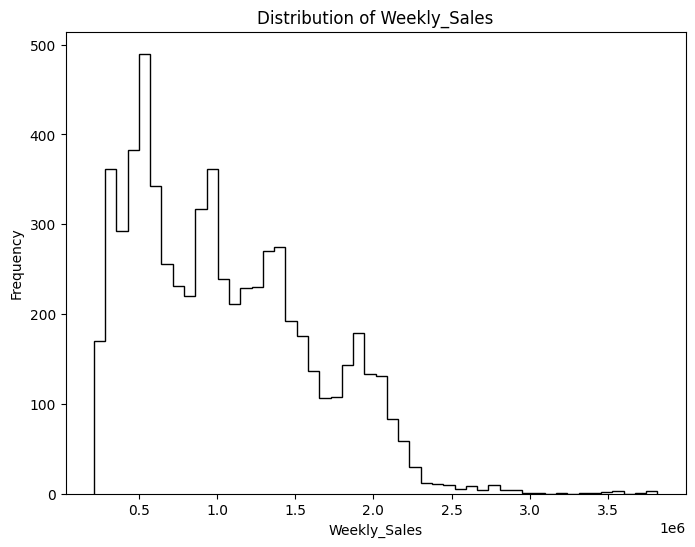

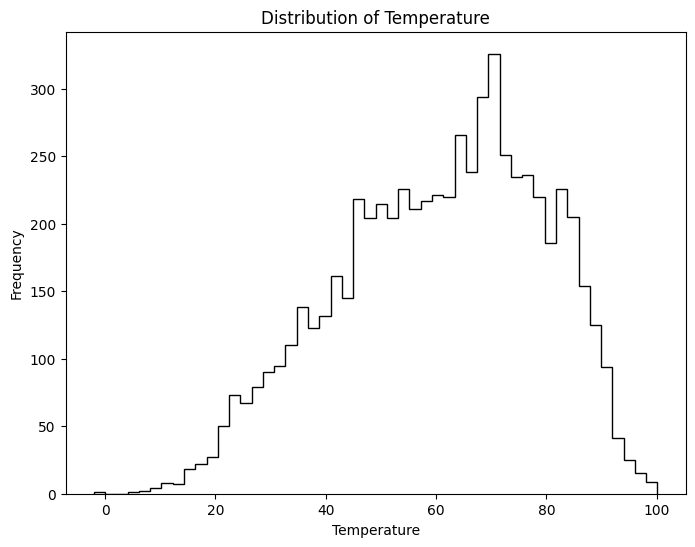

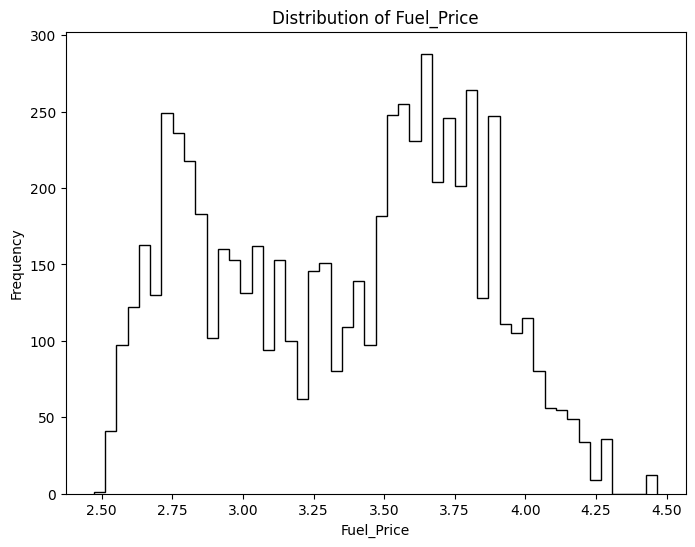

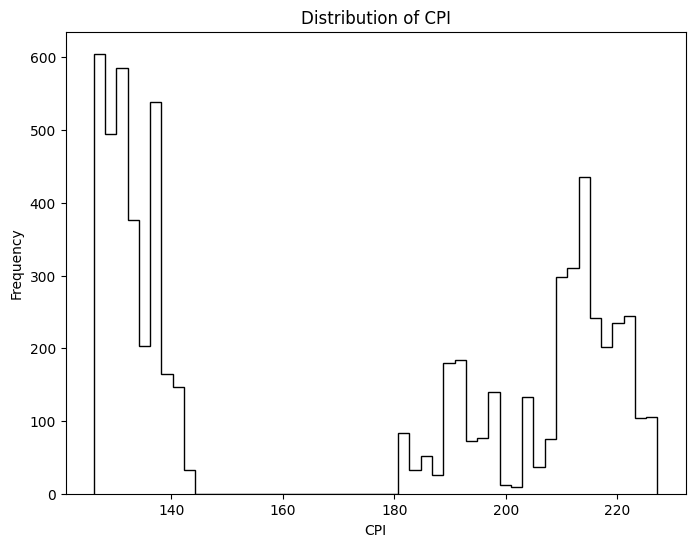

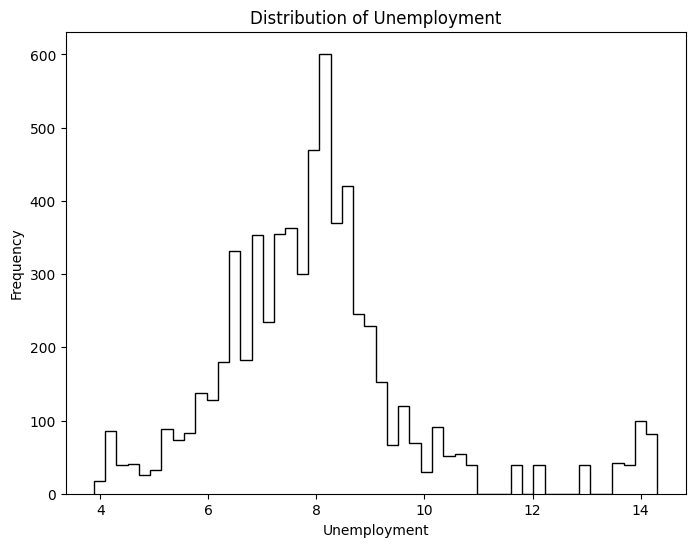

In [14]:
# Define the quantitative variables
quantitative_vars = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Plotting histograms for each quantitative variable
for var in quantitative_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(data[var], color='black',histtype='step',bins=50)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

d)	Perform data cleaning

In [15]:
# Checking for Null Values
print('Number of NA Rows:',data.isna().sum())

# Checking for Duplicated Values
print('Number of Duplicated Rows:',data.duplicated().sum())

Number of NA Rows: Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Number of Duplicated Rows: 0


In [16]:
# Converting the values in the Date Column to the Datetime datatype
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [17]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


2.	Answer the following questions:

a)	Which store has maximum sales?

In [18]:
# Calculating the sum of weekly sales for each store
store_sum_of_sales= data.groupby("Store").agg({"Weekly_Sales": lambda price: price.sum().round()})
store_sum_of_sales.columns=['Sum of Sales']

In [19]:
# Printing the Total Sales Data for each store in descending order
print(store_sum_of_sales.sort_values(by='Sum of Sales',ascending=False))

       Sum of Sales
Store              
20      301397792.0
4       299543953.0
14      288999911.0
13      286517704.0
2       275382441.0
10      271617714.0
27      253855917.0
6       223756131.0
1       222402809.0
39      207445542.0
19      206634862.0
31      199613906.0
23      198750618.0
24      194016021.0
11      193962787.0
28      189263681.0
41      181341935.0
32      166819246.0
18      155114734.0
22      147075649.0
12      144287230.0
26      143416394.0
34      138249763.0
40      137870310.0
35      131520672.0
8       129951181.0
17      127782139.0
45      112395341.0
21      108117879.0
25      101061179.0
43       90565435.0
15       89133684.0
7        81598275.0
42       79565752.0
9        77789219.0
29       77141554.0
16       74252425.0
37       74202740.0
30       62716885.0
3        57586735.0
38       55159626.0
36       53412215.0
5        45475689.0
44       43293088.0
33       37160222.0


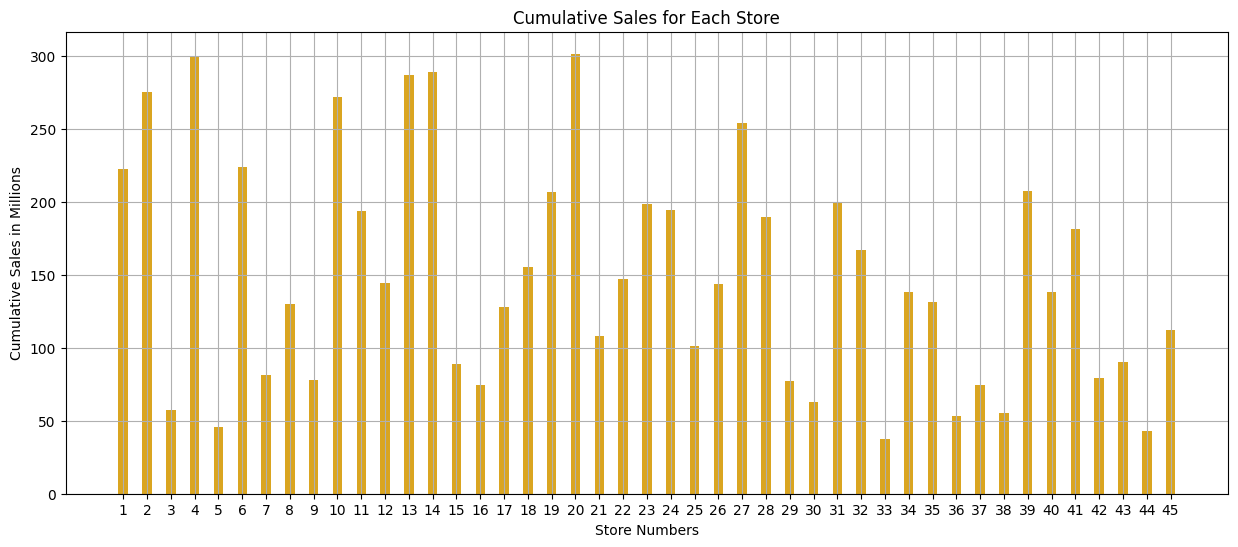

In [20]:
# Get the store numbers
store_numbers = list(range(1, len(store_sum_of_sales) + 1))

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(store_numbers, store_sum_of_sales['Sum of Sales']/1000000, color='goldenrod', width=0.4)
plt.xlabel("Store Numbers")
plt.ylabel("Cumulative Sales in Millions")
plt.title("Cumulative Sales for Each Store")
plt.grid(True)

# Customize x-axis ticks
plt.xticks(store_numbers)

plt.show()
# From the data and the graph we can see that the store with the highest sales is 29

b)	Which store has maximum standard deviation i.e., the sales vary a lot

In [21]:
# Calculating the standard deviation of weekly sales for each store
std_of_sales= data.groupby("Store").agg({"Weekly_Sales": lambda std: std.std().round(3)})
std_of_sales.columns=['Standard Deviation of Sales']

In [22]:
# Printing the Standard Deviation Data for each store in descending order
print(std_of_sales.sort_values(by='Standard Deviation of Sales',ascending=False))

       Standard Deviation of Sales
Store                             
14                      317569.949
10                      302262.063
20                      275900.563
4                       266201.442
13                      265506.996
23                      249788.038
27                      239930.136
2                       237683.695
39                      217466.455
6                       212525.856
35                      211243.458
19                      191722.639
41                      187907.163
28                      181758.968
18                      176641.511
24                      167745.678
11                      165833.888
22                      161251.351
1                       155980.768
12                      139166.872
32                      138017.252
45                      130168.527
21                      128752.813
31                      125855.943
15                      120538.652
40                      119002.113
25                  

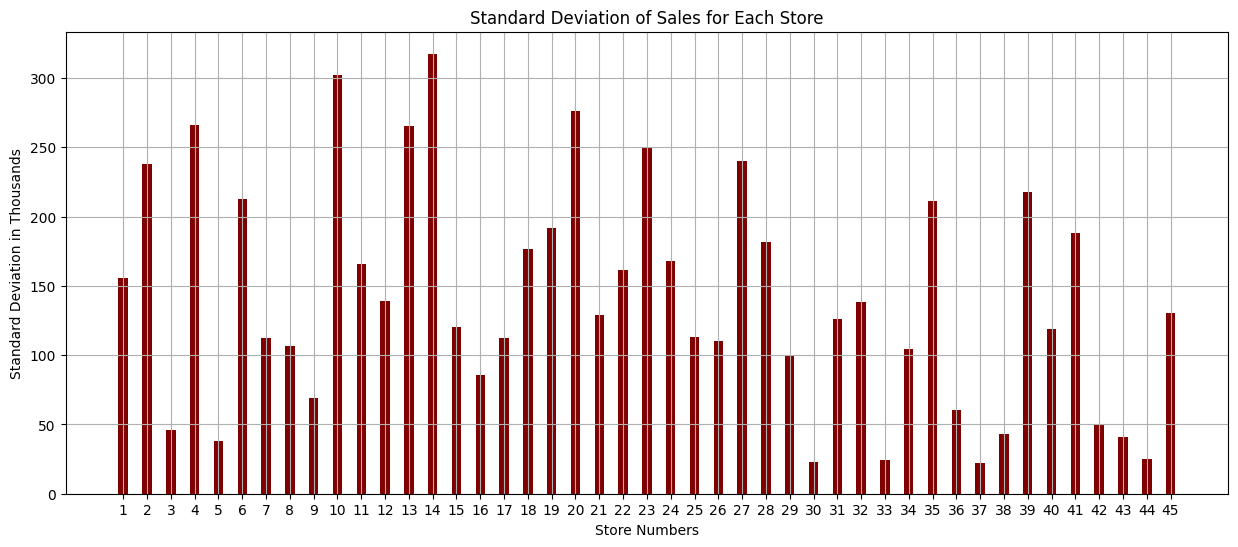

In [23]:
# Plotting
plt.figure(figsize=(15, 6))
plt.bar(store_numbers,std_of_sales['Standard Deviation of Sales']/1000, color ='maroon', width = 0.4)
plt.xlabel("Store Numbers")
plt.ylabel("Standard Deviation in Thousands")
plt.title("Standard Deviation of Sales for Each Store")
plt.grid(True)

# Customize x-axis ticks
plt.xticks(store_numbers)

plt.show()

# From the data and the graph we can see that the store with the highest standard deviation is 14

c)	Some holidays have a negative impact on sales.
    Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [24]:
# Getting the holiday dates
holidays=[]
i=0
while data['Store'].iloc[i]==1: # Iterating through the first store only to avoid duplication
    if data['Holiday_Flag'].iloc[i]==1:
        holidays.append(data['Date'].iloc[i])
    i+=1
holidays

[Timestamp('2010-02-12 00:00:00'),
 Timestamp('2010-09-10 00:00:00'),
 Timestamp('2010-11-26 00:00:00'),
 Timestamp('2010-12-31 00:00:00'),
 Timestamp('2011-02-11 00:00:00'),
 Timestamp('2011-09-09 00:00:00'),
 Timestamp('2011-11-25 00:00:00'),
 Timestamp('2011-12-30 00:00:00'),
 Timestamp('2012-02-10 00:00:00'),
 Timestamp('2012-09-07 00:00:00')]

In [25]:
# Looking up the events of the holiday and adding them
super_bowl=pd.to_datetime(['2010-02-12 00:00:00','2011-02-11 00:00:00','2012-02-10 00:00:00'])
labor_day=pd.to_datetime(['2010-09-10 00:00:00','2011-09-09 00:00:00','2012-09-07 00:00:00'])
thanksgiving=pd.to_datetime(['2010-11-26 00:00:00','2011-11-25 00:00:00'])
christmas=pd.to_datetime(['2010-12-31 00:00:00','2011-12-30 00:00:00'])

# Calculating the mean of sales for each holiday
super_bowl_sales = data.loc[data['Date'].isin(super_bowl)]['Weekly_Sales'].mean().round(3)
labor_day_sales = data.loc[data['Date'].isin(labor_day)]['Weekly_Sales'].mean().round(3)
thanksgiving_sales = data.loc[data['Date'].isin(thanksgiving)]['Weekly_Sales'].mean().round(3)
christmas_sales = data.loc[data['Date'].isin(christmas)]['Weekly_Sales'].mean().round(3)

# Calculating the mean of sales for non-holiday season
non_holiday_sales = data.loc[data['Holiday_Flag']==0]['Weekly_Sales'].mean().round(3)

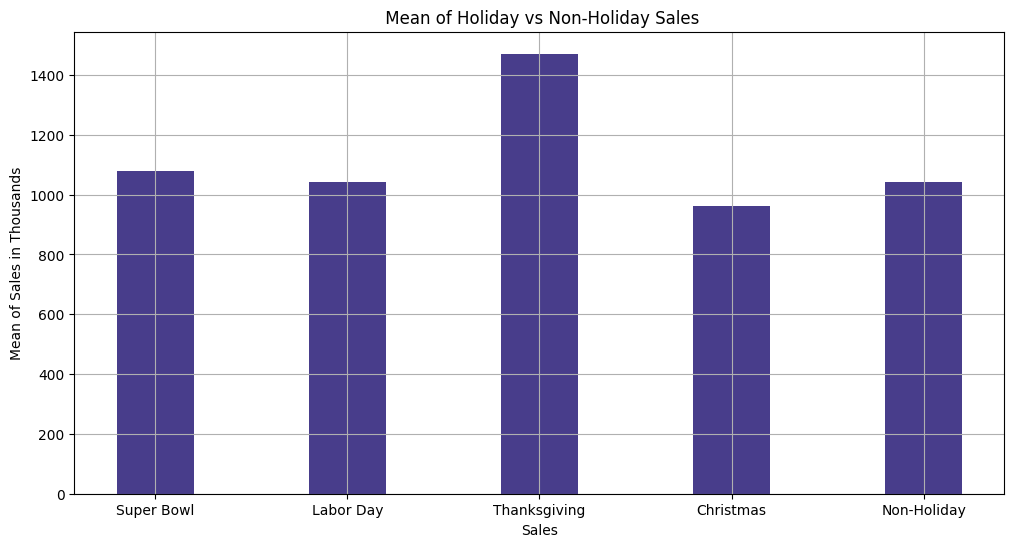

In [26]:
# Making a series to compare the results
comparison = pd.Series({'Super Bowl': super_bowl_sales,
                            'Labor Day': labor_day_sales,
                            'Thanksgiving': thanksgiving_sales,
                            'Christmas': christmas_sales,
                            'Non-Holiday': non_holiday_sales})

# Plotting the comparison
plt.figure(figsize=(12, 6))
plt.bar(comparison.keys(),comparison/1000, color ='darkslateblue', width = 0.4)
plt.xlabel("Sales")
plt.ylabel("Mean of Sales in Thousands")
plt.title(" Mean of Holiday vs Non-Holiday Sales")
plt.grid(True)

plt.show()

d)	Provide a monthly and semester view of sales in units and give insights.

In [27]:
# Filter data for the year 2010, 2011 and 2012
data_2010 = data[data['Date'].dt.year == 2010]
data_2011 = data[data['Date'].dt.year == 2011]
data_2012 = data[data['Date'].dt.year == 2012]

# Group by month and sum weekly sales for the year 2010, 2011 and 2012
monthly_sales_2010 = data_2010.groupby(data_2010['Date'].dt.strftime('%B'))['Weekly_Sales'].sum().round()
monthly_sales_2011 = data_2011.groupby(data_2011['Date'].dt.strftime('%B'))['Weekly_Sales'].sum().round()
monthly_sales_2012 = data_2012.groupby(data_2012['Date'].dt.strftime('%B'))['Weekly_Sales'].sum().round()

# Ordering the data from January to December
# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Rearrange the DataFrame index based on months_order
monthly_sales_2010 = monthly_sales_2010.reindex(months_order)
monthly_sales_2011 = monthly_sales_2011.reindex(months_order)
monthly_sales_2012 = monthly_sales_2012.reindex(months_order)

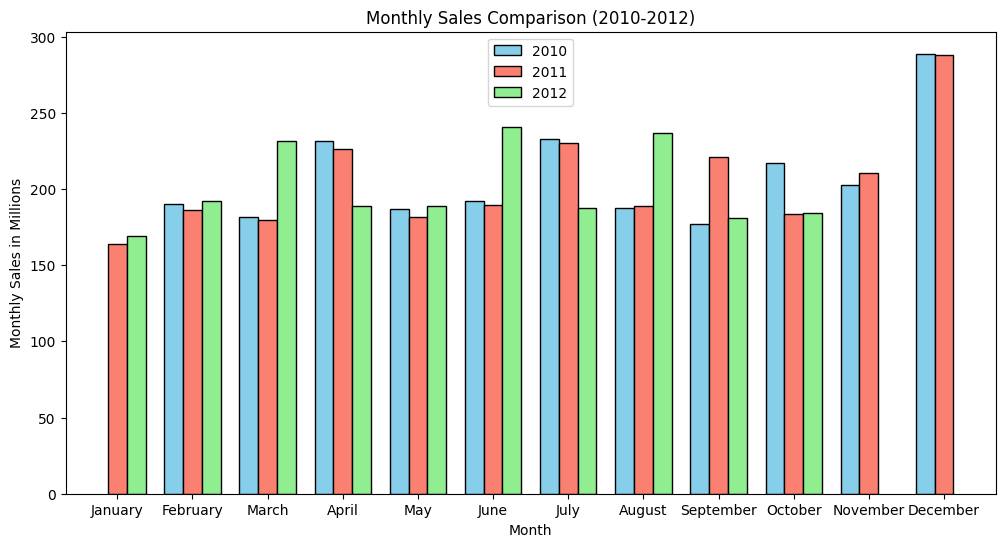

In [28]:
# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(months_order))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(r1, monthly_sales_2010 / 1000000, color='skyblue', width=bar_width, edgecolor='black', label='2010')
plt.bar(r2, monthly_sales_2011 / 1000000, color='salmon', width=bar_width, edgecolor='black', label='2011')
plt.bar(r3, monthly_sales_2012 / 1000000, color='lightgreen', width=bar_width, edgecolor='black', label='2012')

# Add xticks on the middle of the group bars
plt.xlabel('Month')
plt.xticks([r + bar_width for r in range(len(months_order))], months_order)

plt.ylabel('Monthly Sales in Millions')
plt.title('Monthly Sales Comparison (2010-2012)')
plt.legend()

plt.show()

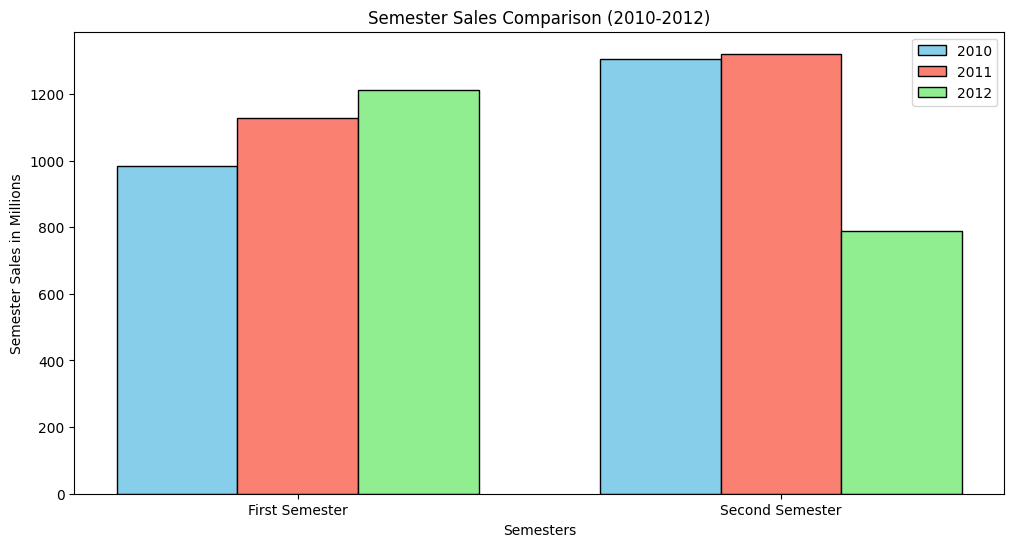

In [29]:
# Providing a semester view of sales for years (2010-2012)
semester_sales_2010=pd.Series([monthly_sales_2010.iloc[0:6].sum(),monthly_sales_2010.iloc[6:12].sum()])
semester_sales_2011=pd.Series([monthly_sales_2011.iloc[0:6].sum(),monthly_sales_2011.iloc[6:12].sum()])
semester_sales_2012=pd.Series([monthly_sales_2012.iloc[0:6].sum(),monthly_sales_2012.iloc[6:12].sum()])

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(semester_sales_2010))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(r1, semester_sales_2010 / 1000000, color='skyblue', width=bar_width, edgecolor='black', label='2010')
plt.bar(r2, semester_sales_2011 / 1000000, color='salmon', width=bar_width, edgecolor='black', label='2011')
plt.bar(r3, semester_sales_2012 / 1000000, color='lightgreen', width=bar_width, edgecolor='black', label='2012')

# Add xticks on the middle of the group bars
plt.xlabel('Semesters')
plt.xticks([r + bar_width for r in range(2)], ['First Semester','Second Semester'])

plt.ylabel('Semester Sales in Millions')
plt.title('Semester Sales Comparison (2010-2012)')
plt.legend()

plt.show()

Sales peak in Summer and December, possibly due to Walmart's selling popular seasonal items or increased consumer spending during these periods of the year.

e)	Plot the relations between weekly sales vs. other numeric features and give insights.

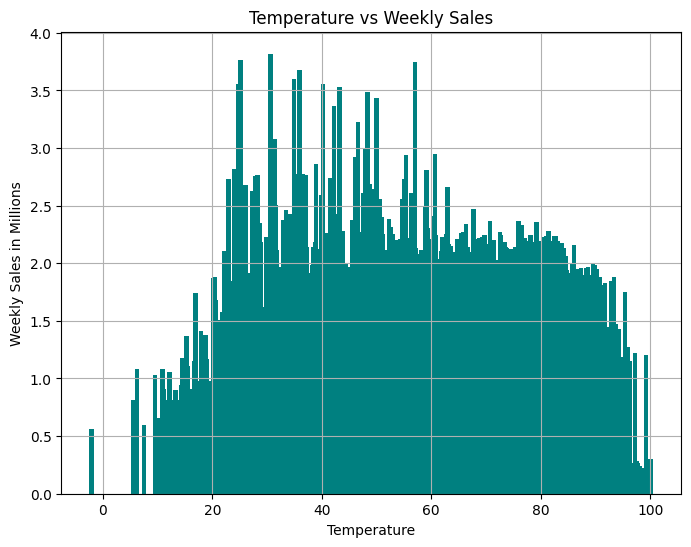

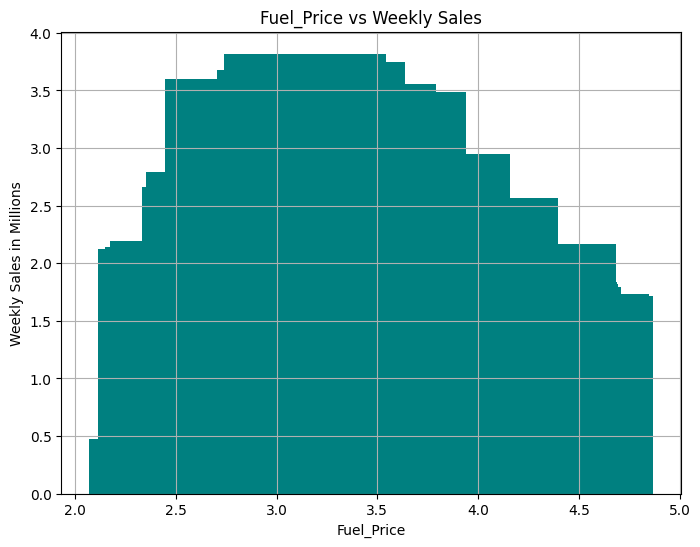

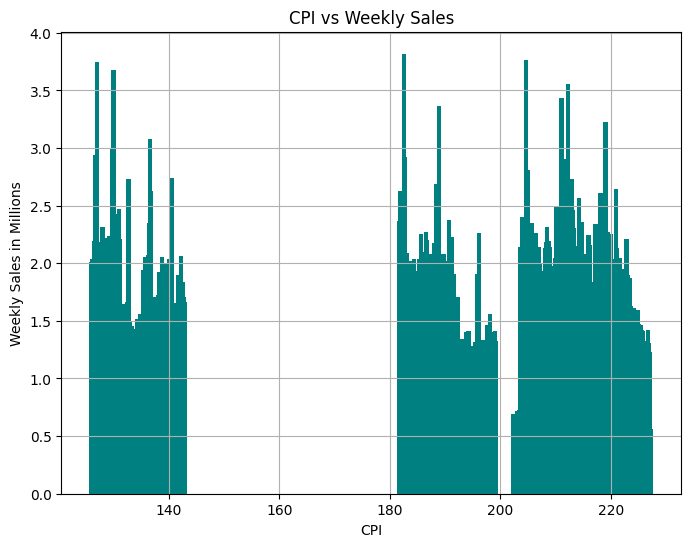

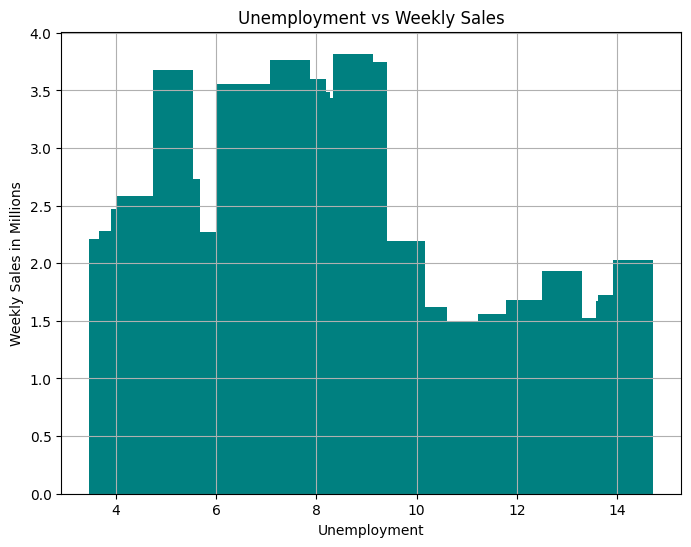

In [30]:
# Plotting the relationships
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.bar(data[feature], data['Weekly_Sales']/1000000, color='teal')
    plt.title(f'{feature} vs Weekly Sales')
    plt.xlabel(feature)
    plt.ylabel('Weekly Sales in Millions')
    plt.grid(True)
    plt.show()

Temprature: Sales are higher during good weather (20 to 80 Fahrenhei) and lower during bad weather (less than 20 or higher than 80 Fahrenheit)
Optimal Range: 20 to 60 Fahrenheit.

Fuel Price: As the Fuel Price increases from 2.0 to around 3.5 the Sales also increase but start to decrease again afterwards.
Optimal Range: 3.0 to 3.5

Consumer Price Index (CPI): No correlation.

Unemployment: As the Unemployment Rates increases from 4 to  9 and starts decreasing afterwards.
Optimal Range: 6 to 9